# Лабораторная работа №4

Вариант 8

## Метрические методы классификации

### Цель работы
- Изучение принципов построения информационных систем с использованием метрических методов классификации.

### Задачи
- изучение инструментария Python для реализации алгоритмов метрической классификации;
- изучение методов оптимизации параметров метрической классификации;
- освоение модификаций kNN-метода.

## Теоритические сведения Early stage diabetes risk prediction dataset.


Early stage diabetes risk prediction dataset представляет собой набор данных, который обычно используется для прогнозирования риска развития диабета на ранних стадиях. Данный набор содержит различные признаки, которые могут быть использованы для определения вероятности развития диабета у пациентов. Давай рассмотрим некоторые теоретические сведения:

1) Цель исследования:
    Основная цель этого исследования заключается в предсказании вероятности развития диабета на ранних стадиях у пациентов. Раннее выявление риска может помочь в принятии профилактических мер и своевременном лечении.
2) Характеристики данных:
    Признаки: Набор данных содержит различные медицинские и демографические признаки, такие как возраст, пол, артериальное давление, уровень глюкозы, индекс массы тела (ИМТ) и другие.
    Целевая переменная: Обычно целевой переменной является бинарный признак, указывающий, развивается ли пациент диабет (1) или нет (0).
3) Применение моделей машинного обучения:
    На основе этих данных можно построить модели машинного обучения для классификации, такие как логистическая регрессия, деревья решений, случайные леса и т. д.
    Модели могут использоваться для предсказания риска диабета на ранних стадиях и определения наиболее важных признаков, влияющих на это предсказание.
4) Оценка моделей:
    Для оценки качества моделей могут использоваться метрики, такие как точность, полнота, F1-мера и AUC-ROC. Эти метрики помогут определить, насколько успешно модель предсказывает риск диабета.
5) Этические соображения:
    Важно учитывать этические аспекты при работе с медицинскими данными. Конфиденциальность и безопасность данных пациентов должны быть обеспечены, и исследование должно соответствовать нормам этики в области медицинского исследования.

In [2]:
!pip install sklearn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post10-py3-none-any.whl size=2981 sha256=53f7895d0690ced5dcb73410401d2a8f1efea16431e94929f8dbfcc92f46f429
  Stored in directory: c:\users\egor davydov\appdata\local\pip\cache\wheels\40\ff\aa\d5ea39ea054381b6eccc737df85530f8637e17f02517284f3f
Successfully built sklearn



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f1/7d/2e562207176a5dcdad513085670674bb11ffaf37e1393eacb6d7fb502481/scikit_learn-1.3.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB 653.6 kB/s eta 0:00:15
   ---------------------------------------- 0.1/9.2 MB 656.4 kB/s eta 0:00:14
    --------------------------------------- 0.1/9.2 MB 944.1 kB/s 


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Чтение данных из файла
data_source = "dataset/diabetes_data_upload.csv"
data = pd.read_csv(data_source)

# Кодирование признаков
data_encoded = pd.get_dummies(data, columns=['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia',
                                             'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing',
                                             'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity'])
# Разделение данных
X = data_encoded.drop('class', axis=1)
y = data_encoded['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение и обучение модели k-ближайших соседей
def build_knn_classifier(X_train, y_train, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

# Предсказание и оценка точности
k_value = int(input("Введите количество ближайших соседей (K): "))

knn_classifier = build_knn_classifier(X_train, y_train, k_value)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

Введите количество ближайших соседей (K): 20
Точность модели: 0.76


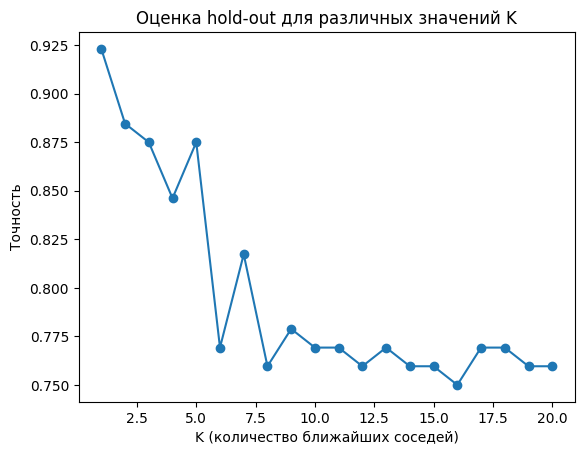

In [16]:
import matplotlib.pyplot as plt

def evaluate_holdout(X_train, y_train, X_test, y_test, k_values):
    accuracies = []

    for k in k_values:
        knn_classifier = build_knn_classifier(X_train, y_train, k)
        y_pred = knn_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    return accuracies

k_values = list(range(1, 21))

holdout_accuracies = evaluate_holdout(X_train, y_train, X_test, y_test, k_values)

plt.plot(k_values, holdout_accuracies, marker='o')
plt.title('Оценка hold-out для различных значений K')
plt.xlabel('K (количество ближайших соседей)')
plt.ylabel('Точность')
plt.show()

1) K = 1: Точность 0.92
    При K = 1 модель использует только одного ближайшего соседа для классификации. Это означает, что она очень чувствительна к выбросам или шуму в данных. Вероятно, она слишком адаптирована к конкретным точкам, что может привести к переобучению.

2) K = 20: Точность 0.76
    При K = 20 модель учитывает 20 ближайших соседей, что может сгладить воздействие выбросов и шума, но в то же время она может упускать локальные закономерности. Модель становится менее чувствительной к отдельным точкам, но при этом может терять важные детали.

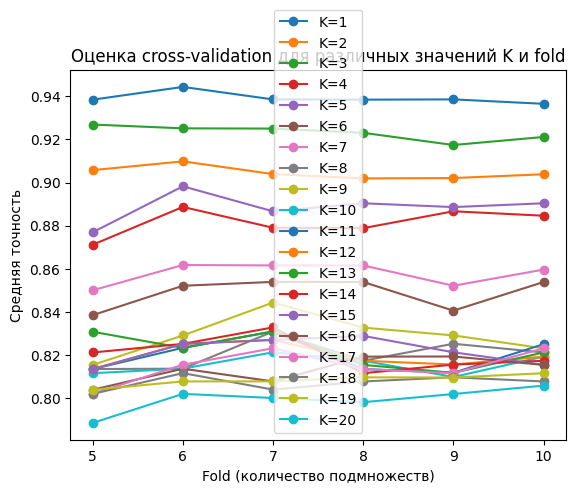

In [18]:
from sklearn.model_selection import cross_val_score

def evaluate_cross_validation(X, y, k_values, fold_values):
    results = {}

    for k in k_values:
        k_results = []
        for fold in fold_values:
            knn_classifier = KNeighborsClassifier(n_neighbors=k)
            scores = cross_val_score(knn_classifier, X, y, cv=fold)
            k_results.append(scores.mean())

        results[k] = k_results

    return results

fold_values = list(range(5, 11))

cross_validation_results = evaluate_cross_validation(X, y, k_values, fold_values)

for k, results in cross_validation_results.items():
    plt.plot(fold_values, results, label=f'K={k}', marker='o')

plt.title('Оценка cross-validation для различных значений K и fold')
plt.xlabel('Fold (количество подмножеств)')
plt.ylabel('Средняя точность')
plt.legend()
plt.show()


In [20]:
optimal_k_holdout = fold_values[holdout_accuracies.index(max(holdout_accuracies))]
print(f"\nОптимальное значение K на основе hold-out: {optimal_k_holdout}")

optimal_k_values = {}
for k, results in cross_validation_results.items():
    optimal_k_values[k] = fold_values[results.index(max(results))]

print("Оптимальные значения K на основе cross-validation:")
for k, optimal_k in optimal_k_values.items():
    print(f"Для K={k}, оптимальное значение fold: {optimal_k}")

best_k = max(optimal_k_values, key=lambda k: cross_validation_results[k][fold_values.index(optimal_k_values[k])])

print(f"\nНаилучшее значение K: {best_k}")

best_knn_classifier = build_knn_classifier(X_train, y_train, best_k)

y_pred_best_k = best_knn_classifier.predict(X_test)

accuracy_best_k = accuracy_score(y_test, y_pred_best_k)
print(f"\nТочность модели с использованием наилучшего значения K: {accuracy_best_k:.2f}")


Оптимальное значение K на основе hold-out: 5
Оптимальные значения K на основе cross-validation:
Для K=1, оптимальное значение fold: 6
Для K=2, оптимальное значение fold: 6
Для K=3, оптимальное значение fold: 5
Для K=4, оптимальное значение fold: 6
Для K=5, оптимальное значение fold: 6
Для K=6, оптимальное значение fold: 7
Для K=7, оптимальное значение fold: 6
Для K=8, оптимальное значение fold: 7
Для K=9, оптимальное значение fold: 7
Для K=10, оптимальное значение fold: 7
Для K=11, оптимальное значение fold: 7
Для K=12, оптимальное значение fold: 7
Для K=13, оптимальное значение fold: 7
Для K=14, оптимальное значение fold: 7
Для K=15, оптимальное значение fold: 8
Для K=16, оптимальное значение fold: 9
Для K=17, оптимальное значение fold: 7
Для K=18, оптимальное значение fold: 6
Для K=19, оптимальное значение fold: 10
Для K=20, оптимальное значение fold: 10

Наилучшее значение K: 1

Точность модели с использованием наилучшего значения K: 0.92


In [22]:
cv_results = evaluate_cross_validation(X_train, y_train, k_values, fold_values)

optimal_k_cv = max(cv_results, key=cv_results.get)
print(f"\nОптимальное значение K на основе cross-validation: {optimal_k_cv}")


Оптимальное значение K на основе cross-validation: 1


## Контрольные вопросы

### Особенности методов метрической классификации:
- Метод ближайшего соседа (1NN): Классификация объекта основывается на классе его ближайшего соседа.
- Метод k ближайших соседей (kNN): Классификация объекта определяется большинством классов k ближайших соседей.

### Принципы и этапы реализации метода kNN:
- Принцип: Определение класса объекта основывается на классе его соседей.
- Этапы:
    Задание количества соседей (K).
    Вычисление расстояний между объектом и всеми точками обучающей выборки.
    Выбор K ближайших соседей.
    Определение класса объекта на основе большинства классов среди соседей.
    
### Выбор количества соседей:
- Количество соседей выбирается эмпирическим путем или с использованием методов оценки качества, таких как hold-out или кросс-валидация.

### Метод парзеновского окна:
- Это обобщение метода kNN, где вес каждого соседа зависит от расстояния до объекта. Чем дальше сосед, тем меньше его вес.

### Параметры для оптимизации в методах kNN:
- k (количество соседей): Оптимизируется для достижения наилучшей производительности.
- Метрика расстояния: Выбор метрики (евклидово расстояние, манхэттенское расстояние и т.д.) может влиять на результаты.